In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load The Dataset** https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification

In [2]:
df=pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')

In [3]:
dfcopy=df.copy()

In [4]:
dfcopy.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
dfcopy.shape

(5572, 5)

In [6]:
dfcopy.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
#Rename Column names
dfcopy=dfcopy.rename(columns={"v1":"Target", "v2": "Text"})

In [8]:
dfcopy.columns

Index(['Target', 'Text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

**Feature Selection**

In [9]:
#Drop Unwanted Columns
dfcopy=dfcopy.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [10]:
dfcopy.columns

Index(['Target', 'Text'], dtype='object')

In [11]:
dfcopy.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Feature Engineering**

In [12]:
#check missing values
dfcopy.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
#check duplicate values
dfcopy.duplicated().sum()

403

In [14]:
dfcopy=dfcopy.drop_duplicates()

In [15]:
dfcopy.duplicated().sum()

0

In [16]:
dfcopy.shape

(5169, 2)

**Encoding: Target Column**

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()
dfcopy["Target"]=le.fit_transform(dfcopy["Target"])

In [19]:
dfcopy.head()      #ham(not spam):0 , spam:1

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Preprocessing Text Column**

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [25]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [26]:
dfcopy["Transformed_text"]=dfcopy["Text"].apply(transform_text)

In [27]:
dfcopy.head()

,Target,Text,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


**Expolatory Data Analysis**

In [28]:
dfcopy.head()

,Target,Text,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [29]:
dfcopy["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

**Count Plot**

<Axes: xlabel='Target', ylabel='count'>

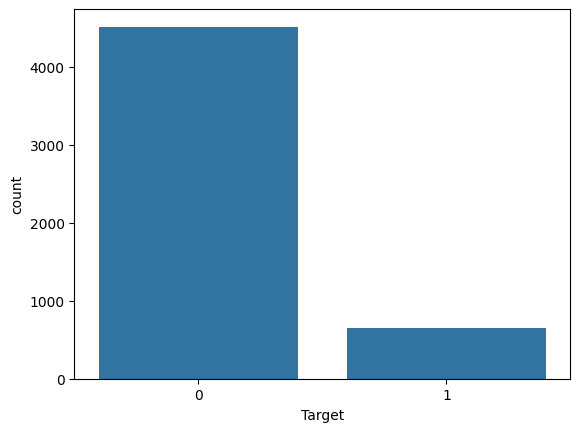

In [30]:
sns.countplot(data=dfcopy,x='Target')

**word Cloud**

In [31]:
from wordcloud import WordCloud

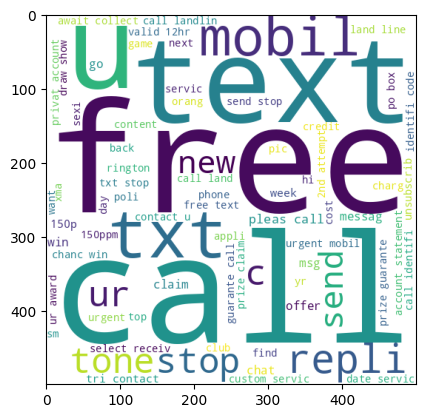

In [32]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
spam_wc=wc.generate(dfcopy[dfcopy["Target"]==1]["Transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

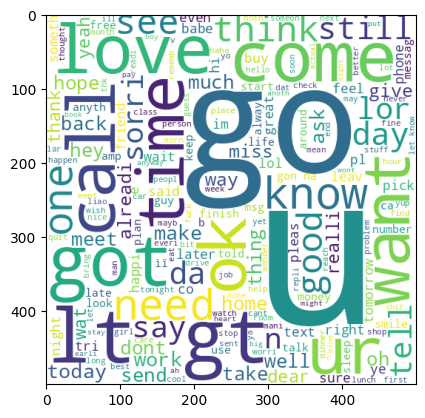

In [33]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
ham_wc=wc.generate(dfcopy[dfcopy["Target"]==0]["Transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

**Text Vectorization:** **without using max_features**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf=TfidfVectorizer()

In [36]:
X=tfidf.fit_transform(dfcopy["Transformed_text"]).toarray()

In [37]:
X.shape  #complete features(vocabulary)

(5169, 6708)

In [38]:
y=dfcopy["Target"]

In [39]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int64

**Train Test Split**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
y_test.value_counts()

Target
0    1331
1     220
Name: count, dtype: int64

**Model Building**

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,ConfusionMatrixDisplay,classification_report

In [44]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

**GaussianNB()**

In [45]:
gnb.fit(X_train,y_train)

GaussianNB()

In [46]:
y_pred1=gnb.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, gnb.predict(X_train))))
accuracy=accuracy_score(y_test,y_pred1)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred1))

Training Accuracy score: 0.9303482587064676
Testing Accuracy score: 0.8749194068343005
error rate: 0.12508059316569953
precision score 0.5375722543352601


In [47]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1331
           1       0.54      0.85      0.66       220

    accuracy                           0.87      1551
   macro avg       0.75      0.86      0.79      1551
weighted avg       0.91      0.87      0.89      1551



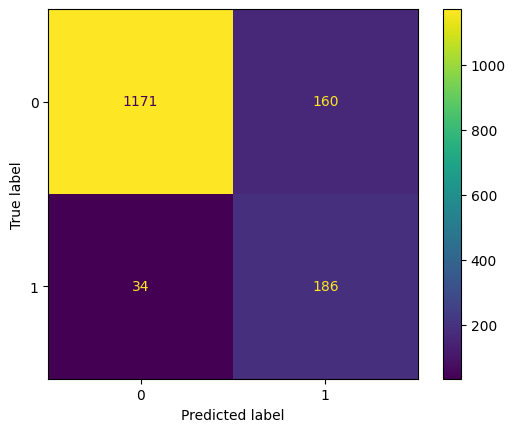

In [48]:
cm=confusion_matrix(y_test,y_pred1)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()

**MultinomialNB()**

In [49]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [50]:
y_pred2=mnb.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, mnb.predict(X_train))))
accuracy=accuracy_score(y_test,y_pred2)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred2))

Training Accuracy score: 0.9676616915422885
Testing Accuracy score: 0.9542230818826564
error rate: 0.045776918117343635
precision score 1.0


In [51]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1331
           1       1.00      0.68      0.81       220

    accuracy                           0.95      1551
   macro avg       0.97      0.84      0.89      1551
weighted avg       0.96      0.95      0.95      1551



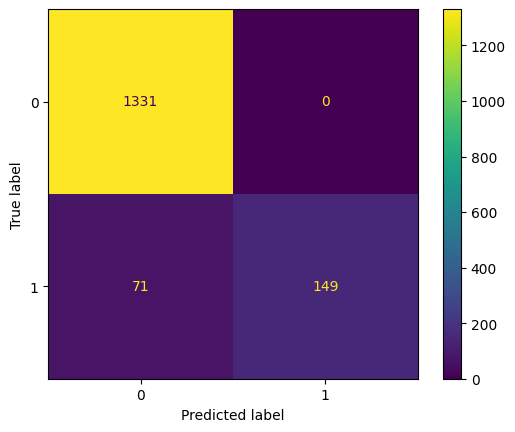

In [52]:
cm=confusion_matrix(y_test,y_pred2)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mnb.classes_)
disp.plot()

**BernoulliNB()**

In [53]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [54]:
y_pred3=bnb.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, bnb.predict(X_train))))
accuracy=accuracy_score(y_test,y_pred3)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred3))

Training Accuracy score: 0.9751243781094527
Testing Accuracy score: 0.9658284977433914
error rate: 0.03417150225660859
precision score 0.9717514124293786


In [55]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1331
           1       0.97      0.78      0.87       220

    accuracy                           0.97      1551
   macro avg       0.97      0.89      0.92      1551
weighted avg       0.97      0.97      0.96      1551



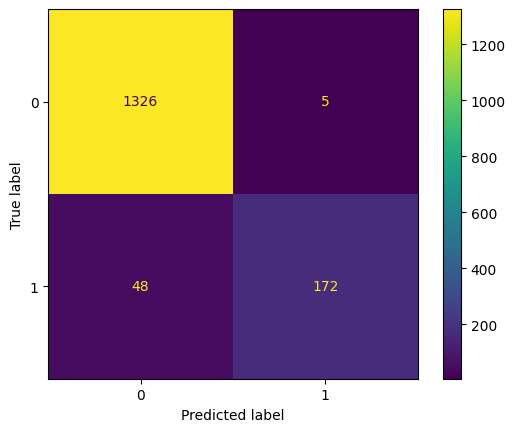

In [56]:
cm=confusion_matrix(y_test,y_pred3)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mnb.classes_)
disp.plot()

**Cross Validation Score**

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
scores=cross_val_score(mnb,X_train,y_train,cv=5,scoring="accuracy")    #mnb

In [59]:
print("cross validation score:{}".format(scores))

cross validation score:[0.94475138 0.93922652 0.94751381 0.93914246 0.93222683]


In [60]:
print("average cross validation score:{}" .format(scores.mean()))

average cross validation score:0.9405722014625983


**Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [63]:
y_pred4=lr.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, lr.predict(X_train))))
accuracy=accuracy_score(y_test,y_pred4)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred4))

Training Accuracy score: 0.9582642343836374
Testing Accuracy score: 0.9413281753707285
error rate: 0.05867182462927145
precision score 0.9574468085106383


In [64]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1331
           1       0.96      0.61      0.75       220

    accuracy                           0.94      1551
   macro avg       0.95      0.80      0.86      1551
weighted avg       0.94      0.94      0.94      1551



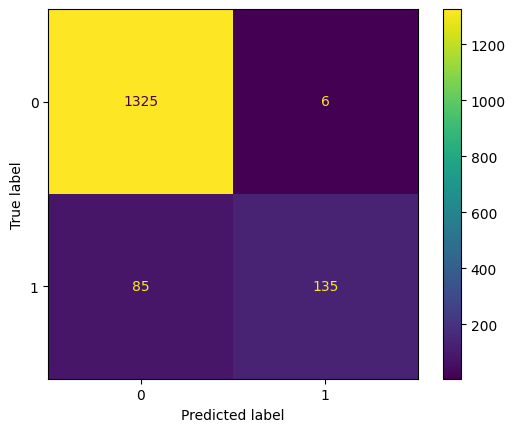

In [65]:
cm=confusion_matrix(y_test,y_pred4)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

**Cross Validation Score**

In [66]:
scores=cross_val_score(lr,X_train,y_train,cv=5,scoring="accuracy")          #lr

In [67]:
print("cross validation score:{}".format(scores))

cross validation score:[0.94475138 0.93232044 0.9461326  0.93222683 0.93637621]


In [68]:
print("average cross validation score:{}" .format(scores.mean()))

average cross validation score:0.9383614925532809


**Comparison**

In [69]:
print("Using Gauusian Naive_Bayes")
accuracy=accuracy_score(y_test,y_pred1)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred1))
print()
print()

print("Using Multinomial Naive_Bayes")
accuracy=accuracy_score(y_test,y_pred2)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred2))
print()
print()

print("Using Bernouli Naive_Bayes")
accuracy=accuracy_score(y_test,y_pred3)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred3))
print()
print()

print("Using Logistic Regression")
accuracy=accuracy_score(y_test,y_pred4)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred4))

Using Gauusian Naive_Bayes
Testing Accuracy score: 0.8749194068343005
error rate: 0.12508059316569953
precision score 0.5375722543352601


Using Multinomial Naive_Bayes
Testing Accuracy score: 0.9542230818826564
error rate: 0.045776918117343635
precision score 1.0


Using Bernouli Naive_Bayes
Testing Accuracy score: 0.9658284977433914
error rate: 0.03417150225660859
precision score 0.9717514124293786


Using Logistic Regression
Testing Accuracy score: 0.9413281753707285
error rate: 0.05867182462927145
precision score 0.9574468085106383


In [ ]:
#tfidf (without using max_features): mnb

**Performance Improvement**

**Text Vectorization: using max_features**

In [148]:
tfidf=TfidfVectorizer(max_features=3000)

In [149]:
X=tfidf.fit_transform(dfcopy["Transformed_text"]).toarray()

In [150]:
X.shape

(5169, 3000)

In [151]:
y=dfcopy["Target"]

In [152]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int64

**Train Test Split**

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [154]:
y_test.value_counts()

Target
0    1331
1     220
Name: count, dtype: int64

**Model Building**

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [156]:
lrc=LogisticRegression(solver='liblinear', penalty='l1')
svc=SVC(kernel='sigmoid', gamma=1.0)
mnb=MultinomialNB()
bnb=BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

**logistic Regression**

In [157]:
lrc.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [158]:
y_pred1=lrc.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, lrc.predict(X_train)))) #same
accuracy=accuracy_score(y_test,y_pred1)
print("Testing Accuracy score: {}".format(accuracy))     #same
error_rate=1-accuracy
print("error rate:",error_rate)            #same
print("precision score",precision_score(y_test,y_pred1))     #Decrease

Training Accuracy score: 0.9621337755666114
Testing Accuracy score: 0.9451966473243069
error rate: 0.05480335267569314
precision score 0.8947368421052632


**Support Vector Machine Classifier**

In [159]:
svc.fit(X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [160]:
y_pred2=svc.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, svc.predict(X_train))))
accuracy=accuracy_score(y_test,y_pred2)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred2))

Training Accuracy score: 0.9853510226644555
Testing Accuracy score: 0.9787234042553191
error rate: 0.021276595744680882
precision score 0.9698492462311558


**Multinomial Naive Bayes**

In [161]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [162]:
y_pred3=mnb.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, mnb.predict(X_train))))  #increase
accuracy=accuracy_score(y_test,y_pred3)
print("Testing Accuracy score: {}".format(accuracy))   #increase
error_rate=1-accuracy
print("error rate:",error_rate)             #decrease
print("precision score",precision_score(y_test,y_pred3))   #decrease

Training Accuracy score: 0.978441127694859
Testing Accuracy score: 0.9716312056737588
error rate: 0.028368794326241176
precision score 0.9888888888888889


In [163]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1331
           1       0.99      0.81      0.89       220

    accuracy                           0.97      1551
   macro avg       0.98      0.90      0.94      1551
weighted avg       0.97      0.97      0.97      1551



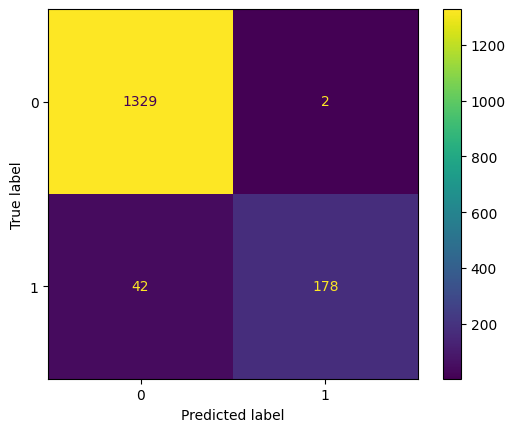

In [164]:
cm=confusion_matrix(y_test,y_pred3)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mnb.classes_)
disp.plot()

**Bernoulli Naive Bayes**

In [165]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [166]:
y_pred4=bnb.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, bnb.predict(X_train))))       #increase
accuracy=accuracy_score(y_test,y_pred4)
print("Testing Accuracy score: {}".format(accuracy))      #increase
error_rate=1-accuracy
print("error rate:",error_rate)      #decrease
print("precision score",precision_score(y_test,y_pred4))  #deccrease

Training Accuracy score: 0.9847982310668878
Testing Accuracy score: 0.9742101869761445
error rate: 0.025789813023855523
precision score 0.9639175257731959


In [167]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1331
           1       0.96      0.85      0.90       220

    accuracy                           0.97      1551
   macro avg       0.97      0.92      0.94      1551
weighted avg       0.97      0.97      0.97      1551



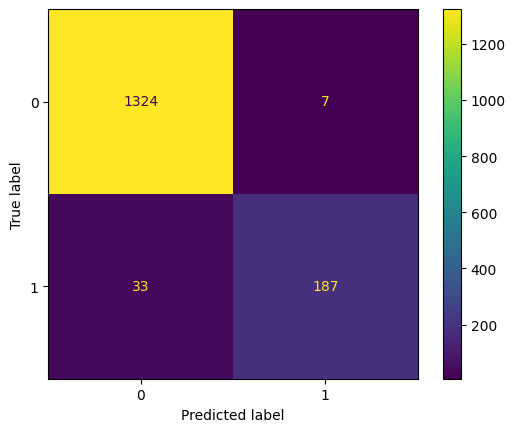

In [168]:
cm=confusion_matrix(y_test,y_pred4)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bnb.classes_)
disp.plot()

**Decision Tree Classifier**

In [169]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [170]:
y_pred5=dtc.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, dtc.predict(X_train))))
accuracy=accuracy_score(y_test,y_pred5)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred5))

Training Accuracy score: 0.9519071310116086
Testing Accuracy score: 0.9342359767891683
error rate: 0.06576402321083175
precision score 0.8597560975609756


**Random Forest Classifier**

In [171]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [172]:
y_pred6=rfc.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, rfc.predict(X_train))))
accuracy=accuracy_score(y_test,y_pred6)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred6))

Training Accuracy score: 0.9994472084024323
Testing Accuracy score: 0.9709864603481625
error rate: 0.029013539651837505
precision score 0.9888268156424581


In [173]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1331
           1       0.99      0.80      0.89       220

    accuracy                           0.97      1551
   macro avg       0.98      0.90      0.94      1551
weighted avg       0.97      0.97      0.97      1551



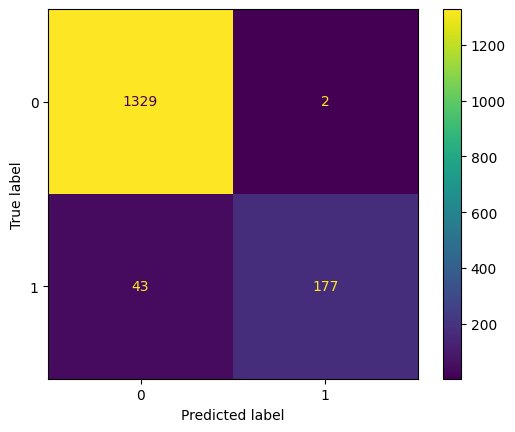

In [174]:
cm=confusion_matrix(y_test,y_pred6)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()

**Extra Trees Classifier**

In [175]:
etc.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [176]:
y_pred7=etc.predict(X_test)
print("Training Accuracy score: {}".format(accuracy_score(y_train, etc.predict(X_train))))
accuracy=accuracy_score(y_test,y_pred7)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred7))

Training Accuracy score: 0.9994472084024323
Testing Accuracy score: 0.9774339136041263
error rate: 0.022566086395873652
precision score 0.9946524064171123


In [177]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1331
           1       0.99      0.85      0.91       220

    accuracy                           0.98      1551
   macro avg       0.98      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551



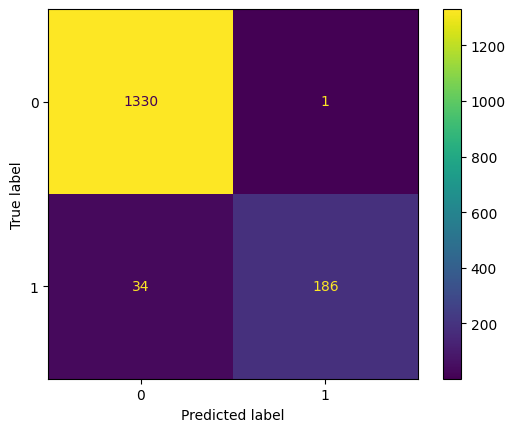

In [178]:
cm=confusion_matrix(y_test,y_pred7)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=etc.classes_)
disp.plot()

**Comparison**

In [179]:
print("Using Logistic Regression")
accuracy=accuracy_score(y_test,y_pred1)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred1))
print()
print()

print("Using Support Vector Classifier")
accuracy=accuracy_score(y_test,y_pred2)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred2))
print()
print()

print("Using Multinomial Naive Bayes")
accuracy=accuracy_score(y_test,y_pred3)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred3))
print()
print()

print("Using Bernoulli Naive Bayes")
accuracy=accuracy_score(y_test,y_pred4)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred4))
print()
print()

print("Using Decision Tree Classifier")
accuracy=accuracy_score(y_test,y_pred5)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred5))
print()
print()

print("Using Random Forest Classifier")
accuracy=accuracy_score(y_test,y_pred6)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred6))
print()
print()

print("Using Extra Trees Classifier")
accuracy=accuracy_score(y_test,y_pred7)
print("Testing Accuracy score: {}".format(accuracy))
error_rate=1-accuracy
print("error rate:",error_rate)
print("precision score",precision_score(y_test,y_pred7))

Using Logistic Regression
Testing Accuracy score: 0.9451966473243069
error rate: 0.05480335267569314
precision score 0.8947368421052632


Using Support Vector Classifier
Testing Accuracy score: 0.9787234042553191
error rate: 0.021276595744680882
precision score 0.9698492462311558


Using Multinomial Naive Bayes
Testing Accuracy score: 0.9716312056737588
error rate: 0.028368794326241176
precision score 0.9888888888888889


Using Bernoulli Naive Bayes
Testing Accuracy score: 0.9742101869761445
error rate: 0.025789813023855523
precision score 0.9639175257731959


Using Decision Tree Classifier
Testing Accuracy score: 0.9342359767891683
error rate: 0.06576402321083175
precision score 0.8597560975609756


Using Random Forest Classifier
Testing Accuracy score: 0.9709864603481625
error rate: 0.029013539651837505
precision score 0.9888268156424581


Using Extra Trees Classifier
Testing Accuracy score: 0.9774339136041263
error rate: 0.022566086395873652
precision score 0.9946524064171123


In [ ]:
# tfidf(using max_features): etc,mnb,rfc

**Final Evaluation On Random Emails**

**1: Spam**

In [180]:
email_content="""Subject: Urgent: You Have Won a $1,000,000 Lottery!

Body:

Dear User,

Congratulations! You have been selected as the winner of the $1,000,000 International Lottery. This is a once-in-a-lifetime opportunity to change your life forever. We randomly selected your email address from our database, and you are the lucky recipient of this grand prize.

To claim your prize, please follow these simple steps:

Click on the link below to access the secure claim form.
Fill out your personal details, including your full name, address, and phone number.
Submit the form and await our confirmation email."""

In [181]:
# Preprocess the email content
processed_email=transform_text(email_content)

In [182]:
email_vector=tfidf.transform([processed_email])

In [183]:
prediction=etc.predict(email_vector)      #Extra Tree Classifier (Pass)
if prediction== 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

The email is classified as SPAM.


In [184]:
prediction=mnb.predict(email_vector)      #Multinomial Naive Bayes (Pass)
if prediction== 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

The email is classified as SPAM.


In [185]:
prediction=bnb.predict(email_vector)      #Bernoulli Naive Bayes (Pass)
if prediction== 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

The email is classified as SPAM.


In [186]:
prediction=rfc.predict(email_vector)      #Random Forest Classifier (Pass)
if prediction== 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

The email is classified as SPAM.


**2: Not Spam**

In [187]:
email_content="""Your package is on the way!
Hi Aqsa,

We are happy to share that item(s) from your order # 184331517484509 has been shipped and it is on the way to the last mile hub. If you have ordered from different sellers, your packages will be delivered separately."""

In [188]:
# Preprocess the email content
processed_email=transform_text(email_content)

In [189]:
email_vector=tfidf.transform([processed_email])

In [190]:
prediction=etc.predict(email_vector)     #Extra Tress Classifier (pass)
if prediction== 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

The email is classified as NOT SPAM.


In [191]:
prediction=mnb.predict(email_vector)     #Multinomial Naive Bayes (pass)
if prediction== 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

The email is classified as NOT SPAM.


In [192]:
prediction=bnb.predict(email_vector)     #Bernoulli Naive Bayes (pass)
if prediction== 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

The email is classified as NOT SPAM.


In [193]:
prediction=rfc.predict(email_vector)     #Random Forest Classifier (pass)
if prediction== 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

The email is classified as NOT SPAM.
